<a href="https://colab.research.google.com/github/arthurcamargotradingcomdados/tutoriais_publicos/blob/main/HERC_Otimiza%C3%A7%C3%A3o_23_03_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hierachical Equal Risk Contribution

- desenvolvido por: https://www.linkedin.com/in/arthur-camargo/
- referências:https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3237540

Material para fins educacionais

##Instalando Bibliotecas

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#1º Passo
!pip uninstall matplotlib
!pip install matplotlib

Found existing installation: matplotlib 3.7.1
Uninstalling matplotlib-3.7.1:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/matplotlib-3.7.1-py3.9-nspkg.pth
    /usr/local/lib/python3.9/dist-packages/matplotlib-3.7.1.dist-info/*
    /usr/local/lib/python3.9/dist-packages/matplotlib/*
    /usr/local/lib/python3.9/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.9/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.9/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.9/dist-packages/pylab.py
Proceed (Y/n)? Y
  Successfully uninstalled matplotlib-3.7.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 52.5 MB/s eta 0:00:00


In [3]:
#2º passo
exit()

In [4]:
#4º passo
!pip install pybind11

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.3/222.3 KB 5.4 MB/s eta 0:00:00


In [5]:
!pip install riskfolio-lib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 59.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.0/908.0 KB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 12.8 MB/s eta 0:00:00
  Created wheel for riskfolio-lib: filename=Riskfolio_Lib-4.0.3-cp39-cp39-linux_x86_64.whl size=178709 sha256=921fd28d72f281b1723019ac324e1a1e51bcf66732713b865bfba78604349a52
  Stored in directory: /root/.cache/pip/wheels/92/ea/e7/11b98922268bb34934514d425f7f2a563fc72e1fb7f768ef60
Successfully built riskfolio-lib


In [1]:
import riskfolio as rp
import pandas as pd
import numpy as np
import yfinance as yf

##Passo a passo

Hierarchical Tree Clustering

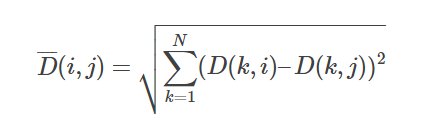

Selecionando número ótimo de clusters

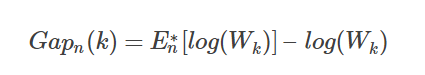

Top-Down Bisecção Recursiva

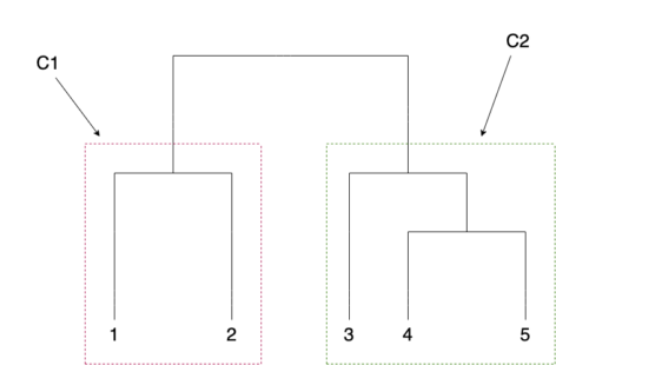

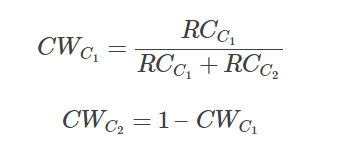

Paridade de risco ingênua entre clusters

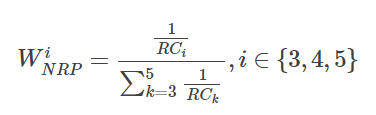

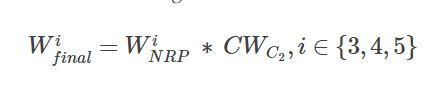

##Parâmetros

In [5]:
#Data
inicio = '2016-01-01'
fim = '2022-12-31'

#Seleção dos ativos para a carteira

ativos = ['PETR4.SA', 'VALE3.SA', 'BBDC4.SA', 'ITSA4.SA', 'ABEV3.SA', 'WEGE3.SA', 'IVVB11.SA']


In [6]:
#Dados de preço da carteira

carteira = yf.download(ativos, start=inicio, end=fim)['Adj Close']
carteira.head()

[*********************100%***********************]  7 of 7 completed


,ABEV3.SA,BBDC4.SA,ITSA4.SA,IVVB11.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2016-01-04,13.508918,6.377031,3.069825,83.110001,3.027316,8.238918,4.985650
2016-01-05,13.720853,6.400206,3.120988,83.000000,2.943592,8.128547,5.227439
2016-01-06,13.587413,6.309495,3.148896,82.099998,2.820208,7.531242,5.108245
2016-01-07,13.226337,6.181828,3.102383,81.000000,2.758516,7.083262,4.961812
2016-01-08,13.399025,6.060877,3.102383,80.000000,2.762922,6.843042,4.937973


In [7]:
#Calcular os retornos

retornos = carteira.pct_change().dropna()
retornos

,ABEV3.SA,BBDC4.SA,ITSA4.SA,IVVB11.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2016-01-05,0.015689,0.003634,0.016666,-0.001324,-0.027656,-0.013396,0.048497
2016-01-06,-0.009725,-0.014173,0.008942,-0.010843,-0.041916,-0.073482,-0.022802
2016-01-07,-0.026574,-0.020234,-0.014771,-0.013398,-0.021875,-0.059483,-0.028666
2016-01-08,0.013056,-0.019565,0.000000,-0.012346,0.001597,-0.033914,-0.004804
2016-01-11,-0.015817,-0.028270,-0.011994,-0.007500,-0.028708,-0.028463,-0.022759
...,...,...,...,...,...,...,...
2022-12-23,0.013870,0.017473,0.016588,-0.006364,0.047103,0.006647,-0.011299
2022-12-26,-0.006840,-0.023778,-0.012821,0.001830,-0.007166,0.009152,-0.008052
2022-12-27,0.000000,-0.004736,-0.010626,0.014612,0.006816,0.023878,-0.004713


/usr/local/lib/python3.9/dist-packages/riskfolio/src/PlotFunctions.py:2296: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


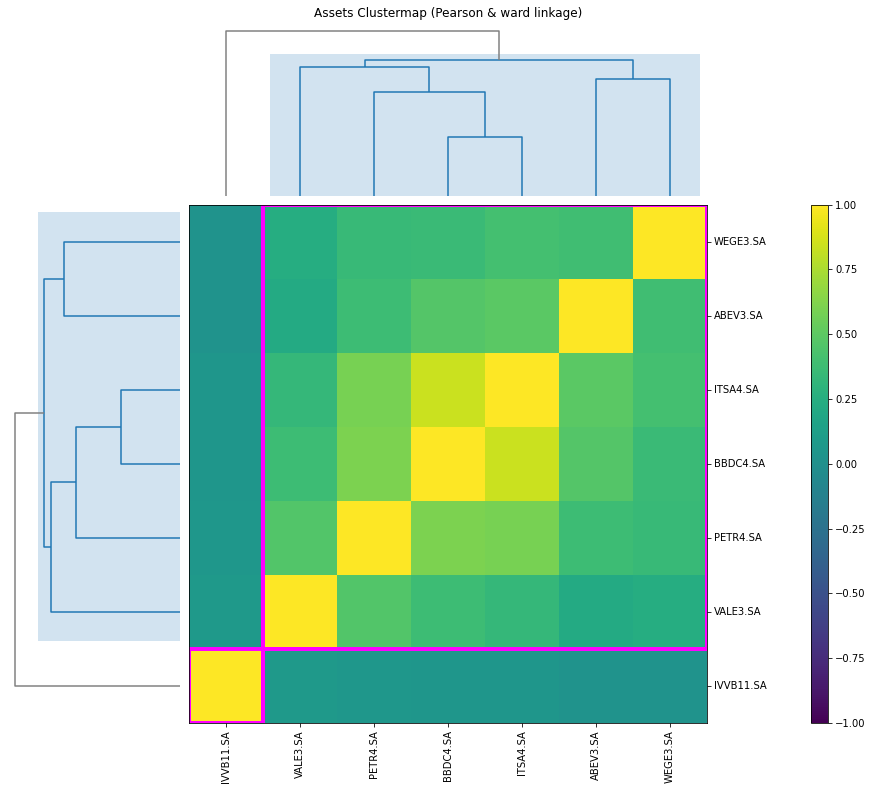

In [9]:
#Plot de clusters

ax = rp.plot_clusters(returns=retornos,
                      codependence='pearson',
                      linkage='ward',
                      k=None,
                      max_k=10,
                      leaf_order=True,
                      dendrogram=True,
                      ax=None)

##Construir o portfólio

In [13]:
portfolio = rp.HCPortfolio(returns=retornos)

In [36]:
#Parâmetros do portfólio

model = 'HERC'
codependence = 'pearson'
rm = 'MV'
rf = 0
linkage = 'ward'
max_k = 10
leaf_order = True

pesos = portfolio.optimization(model=model,
                              codependence=codependence,
                              rm=rm,
                              rf=rf,
                              max_k=max_k,
                              leaf_order=leaf_order)

In [37]:
display(pesos.T)

,ABEV3.SA,BBDC4.SA,ITSA4.SA,IVVB11.SA,PETR4.SA,VALE3.SA,WEGE3.SA
weights,0.204509,0.118914,0.173154,0.233324,0.066418,0.078783,0.124899


In [38]:
display(pesos_hrp.T)

,ABEV3.SA,BBDC4.SA,ITSA4.SA,IVVB11.SA,PETR4.SA,VALE3.SA,WEGE3.SA
weights,0.229429,0.100279,0.14602,0.165788,0.099885,0.11848,0.140118


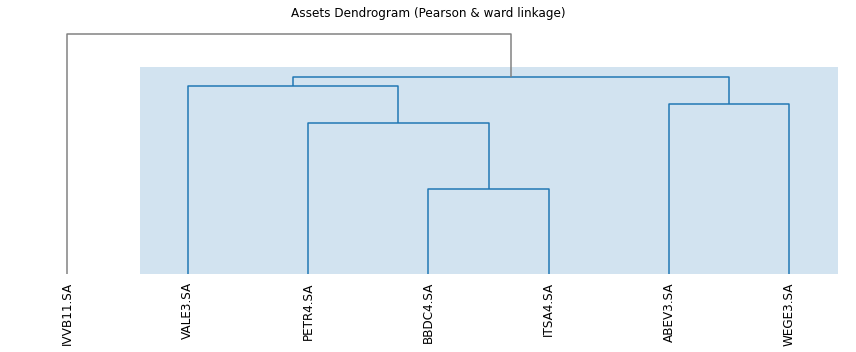

In [19]:
ax = rp.plot_dendrogram(returns=retornos,
                      codependence='pearson',
                      linkage='ward',
                      k=None,
                      max_k=10,
                      leaf_order=True,
                      ax=None)

/usr/local/lib/python3.9/dist-packages/riskfolio/src/PlotFunctions.py:605: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sizes2 = sizes2.append(item)


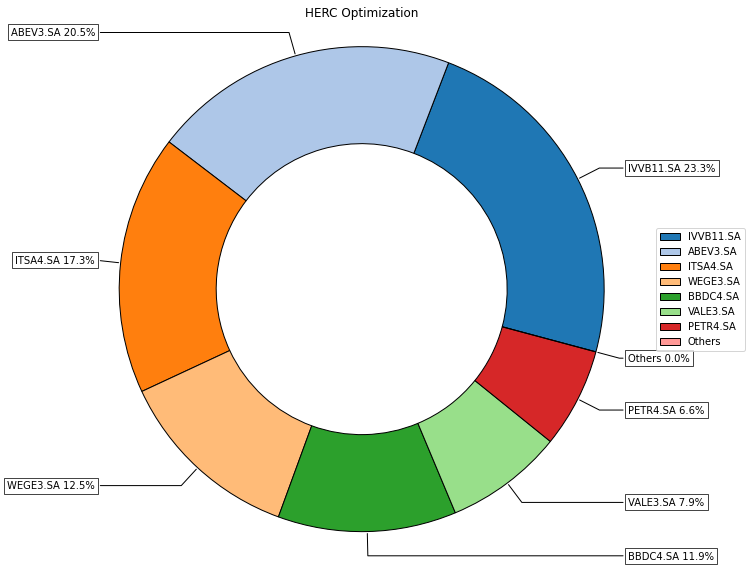

In [20]:
ax = rp.plot_pie(w=pesos,
                 title='HERC Optimization',
                 others=0.05,
                 nrow=25,
                 cmap='tab20',
                 height=8,
                 width=10,
                 ax=None)

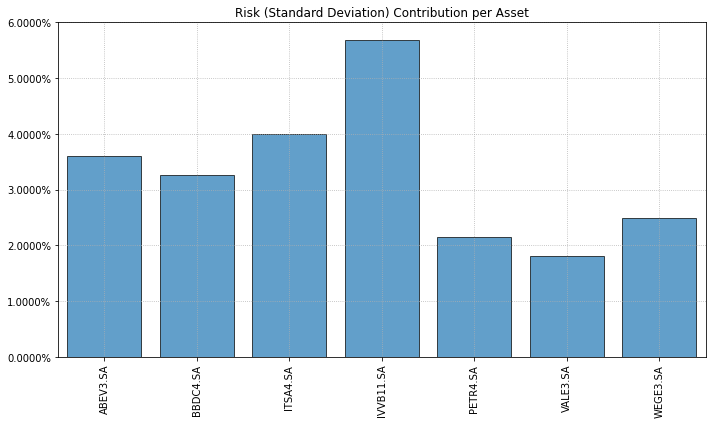

In [24]:
mu = retornos.mean()
cov = retornos.cov()

ax = rp.plot_risk_con(w=pesos,
                  cov=cov,
                  returns=retornos,
                  rm=rm,
                  rf=rf,
                  alpha=0.05,
                  color='tab:blue',
                  height=6,
                  width=10,
                  t_factor=252,
                  ax=None)

##Hierachical Risk Parity

In [35]:
model = 'HRP'
codependence = 'pearson'
rm = 'MV'
rf = 0
linkage = 'single'
max_k = 10
leaf_order = True

pesos_hrp = portfolio.optimization(model=model,
                              codependence=codependence,
                              rm=rm,
                              rf=rf,
                              max_k=max_k,
                              leaf_order=leaf_order)

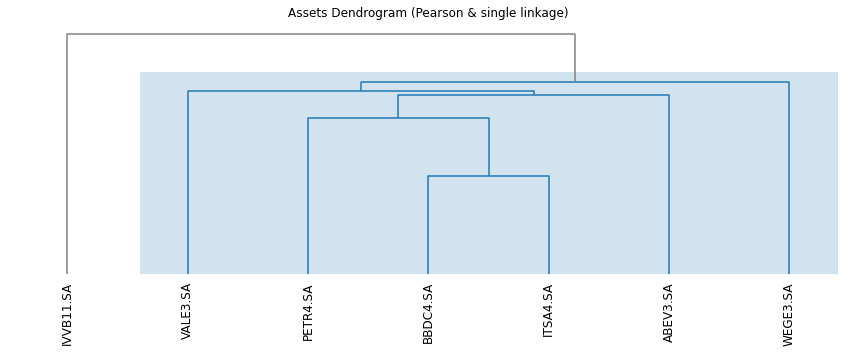

In [27]:
ax = rp.plot_dendrogram(returns=retornos,
                      codependence='pearson',
                      linkage='single',
                      k=None,
                      max_k=10,
                      leaf_order=True,
                      ax=None)

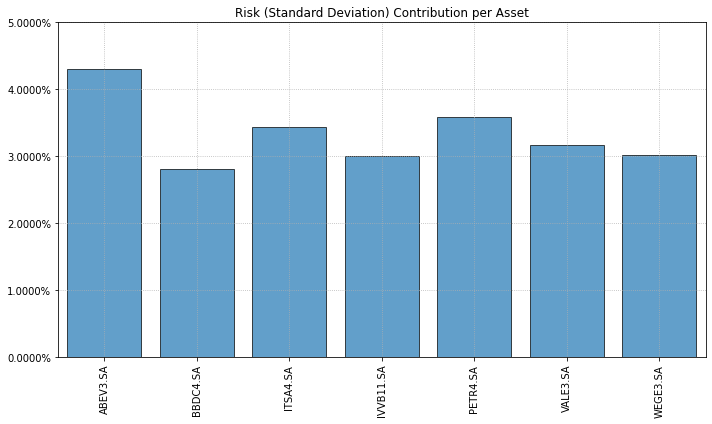

In [29]:
mu = retornos.mean()
cov = retornos.cov()

ax = rp.plot_risk_con(w=pesos_hrp,
                  cov=cov,
                  returns=retornos,
                  rm=rm,
                  rf=rf,
                  alpha=0.05,
                  color='tab:blue',
                  height=6,
                  width=10,
                  t_factor=252,
                  ax=None)

In [30]:
print(pesos)

            weights
ABEV3.SA   0.229429
BBDC4.SA   0.100279
ITSA4.SA   0.146020
IVVB11.SA  0.165788
PETR4.SA   0.099885
VALE3.SA   0.118480
WEGE3.SA   0.140118


In [31]:
print(pesos_hrp)

            weights
ABEV3.SA   0.229429
BBDC4.SA   0.100279
ITSA4.SA   0.146020
IVVB11.SA  0.165788
PETR4.SA   0.099885
VALE3.SA   0.118480
WEGE3.SA   0.140118


##HERC

/usr/local/lib/python3.9/dist-packages/riskfolio/src/RiskFunctions.py:436: RuntimeWarning: overflow encountered in exp
  value = np.mean(np.exp(-1 / z * a), axis=0)
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


<Axes: >

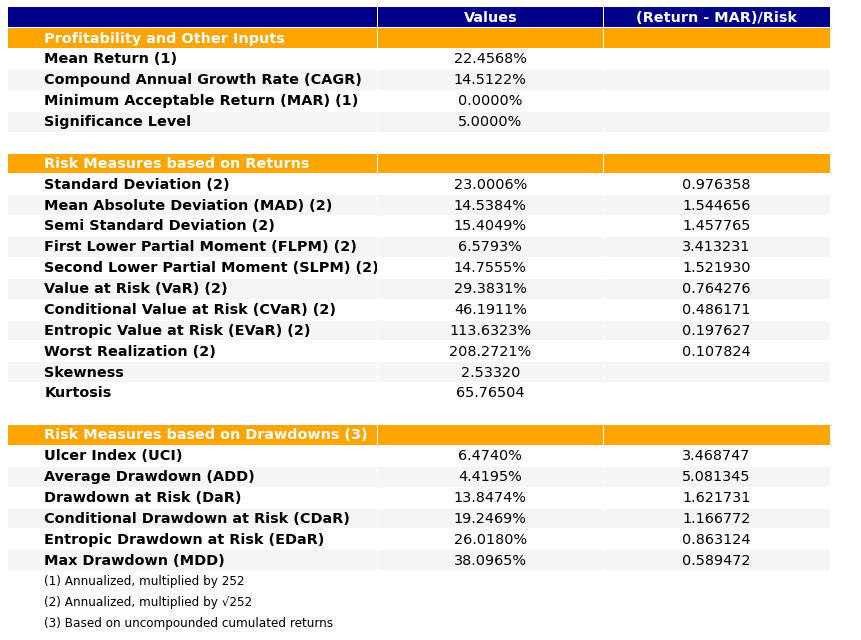

In [39]:
rp.plot_table(returns=retornos, w=pesos, MAR=0, alpha=0.05, ax=None)

##HRP

<Axes: >

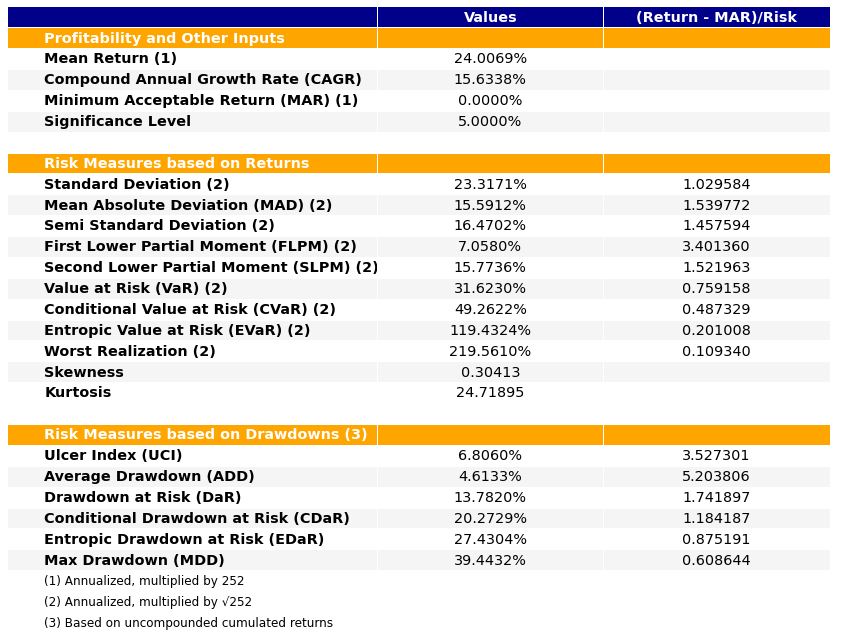

In [40]:
rp.plot_table(returns=retornos, w=pesos_hrp, MAR=0, alpha=0.05, ax=None)